In [1]:
import pandas as pd

In [2]:
import numpy as np

In [4]:
# exchanged laser for a new 670nm laser to see how it compares

In [5]:
# importing data containing wavelength info

In [6]:
file1  = '/Users/feb9528/Desktop/files/2024_2_1_TEC/10.002kOhm.csv'
file2  = '/Users/feb9528/Desktop/files/2024_2_1_TEC/11.002kOhm.csv'
file3  = '/Users/feb9528/Desktop/files/2024_2_1_TEC/12.001kOhm.csv'
file4  = '/Users/feb9528/Desktop/files/2024_2_1_TEC/13.001kOhm.csv'
file5  = '/Users/feb9528/Desktop/files/2024_2_1_TEC/14.001kOhm.csv'
file6  = '/Users/feb9528/Desktop/files/2024_2_1_TEC/15.001kOhm.csv'
file7  = '/Users/feb9528/Desktop/files/2024_2_1_TEC/16.000kOhm.csv'
file8  = '/Users/feb9528/Desktop/files/2024_2_1_TEC/17.000kOhm.csv'
file9  = '/Users/feb9528/Desktop/files/2024_2_1_TEC/18.001kOhm.csv'
file10 = '/Users/feb9528/Desktop/files/2024_2_1_TEC/19.003kOhm.csv'

In [7]:
# reading only from the Peak Position (nm [air]) column

df1  = pd.read_csv(file1,  skiprows=[0], usecols=[2])
df2  = pd.read_csv(file2,  skiprows=[0], usecols=[2])
df3  = pd.read_csv(file3,  skiprows=[0], usecols=[2])
df4  = pd.read_csv(file4,  skiprows=[0], usecols=[2])
df5  = pd.read_csv(file5,  skiprows=[0], usecols=[2])
df6  = pd.read_csv(file6,  skiprows=[0], usecols=[2])
df7  = pd.read_csv(file7,  skiprows=[0], usecols=[2])
df8  = pd.read_csv(file8,  skiprows=[0], usecols=[2])
df9  = pd.read_csv(file9,  skiprows=[0], usecols=[2])
df10 = pd.read_csv(file10, skiprows=[0], usecols=[2])

In [8]:
# ignore empty values

df1  = df1.dropna()
df2  = df2.dropna()
df3  = df3.dropna()
df4  = df4.dropna()
df5  = df5.dropna()
df6  = df6.dropna()
df7  = df7.dropna()
df8  = df8.dropna()
df9  = df9.dropna()
df10 = df10.dropna()

In [9]:
# read the wavelength values from each run to an array

lambda1  = df1.values
lambda2  = df2.values
lambda3  = df3.values
lambda4  = df4.values
lambda5  = df5.values
lambda6  = df6.values
lambda7  = df7.values
lambda8  = df8.values
lambda9  = df9.values
lambda10 = df10.values

In [10]:
# Finding average wavelength of each data run

In [11]:
# append wavelengths to an array
wavelengths = []

In [12]:
avg1 = 0
for i in lambda1:
    avg1 = avg1 + i[0]
    
avg1 = avg1/len(lambda1)
wavelengths.append(avg1)

avg2 = 0
for i in lambda2:
    avg2 = avg2 + i[0]
    
avg2 = avg2/len(lambda2)
wavelengths.append(avg2)

avg3 = 0
for i in lambda3:
    avg3 = avg3 + i[0]
    
avg3 = avg3/len(lambda3)
wavelengths.append(avg3)

avg4 = 0
for i in lambda4:
    avg4 = avg4 + i[0]
    
avg4 = avg4/len(lambda4)
wavelengths.append(avg4)

avg5 = 0
for i in lambda5:
    avg5 = avg5 + i[0]
    
avg5 = avg5/len(lambda5)
wavelengths.append(avg5)

avg6 = 0
for i in lambda6:
    avg6 = avg6 + i[0]
    
avg6 = avg6/len(lambda6)
wavelengths.append(avg6)

avg7 = 0
for i in lambda7:
    avg7 = avg7 + i[0]
    
avg7 = avg7/len(lambda7)
wavelengths.append(avg7)

avg8 = 0
for i in lambda8:
    avg8 = avg8 + i[0]
    
avg8 = avg8/len(lambda8)
wavelengths.append(avg8)

avg9 = 0
for i in lambda9:
    avg9 = avg9 + i[0]
    
avg9 = avg9/len(lambda9)
wavelengths.append(avg9)

avg10 = 0
for i in lambda10:
    avg10 = avg10 + i[0]
    
avg10 = avg10/len(lambda10)
wavelengths.append(avg10)

In [13]:
len(wavelengths)

10

In [14]:
print(wavelengths)

[670.9191369797919, 670.4363954038841, 670.1907425567565, 669.8898934771428, 669.622950972249, 669.4221488263646, 669.1530972905209, 669.0143433000001, 668.7739004558437, 668.6530925878072]


In [15]:
# list of resistances
res = [10.002, 11.002, 12.001, 13.001, 14.001, 15.001, 16.000, 17.000, 18.001, 19.003]

In [16]:
# Using the thermistor resistance to temperature forumula from Thorlabs TEC manual and specs of HL6756MG laser

In [17]:
# nominal temperature in Kelvin
T_o = 298.15

# thermistor nominal resistance at nominal temperature in kOhm
R_o = 10

# energy constant/B value in Kelvin
B = 3977

# append temperatures to a list
temps = []

In [18]:
# Converting resistance to temperature and changing temp in Kelvin to Celcius

for i in range(0, len(wavelengths)):
    T_K = (B * T_o)/((T_o * np.log(res[i]/R_o)) + B)
    T_C = T_K - 273.15
    temps.append(T_C)

In [19]:
print(temps)

[24.99553013820531, 22.88074631110527, 20.977908681656004, 19.24713315170351, 17.66273737889958, 16.20304902492262, 14.85210203794992, 13.593227994498477, 12.415228857904879, 11.308797874144943]


In [20]:
len(temps)

10

In [21]:
# Plotting temperature vs wavelength graph

In [22]:
import matplotlib.pyplot as plt
from scipy import stats 

In [23]:
# line fit of data
fit = stats.linregress(wavelengths, temps)

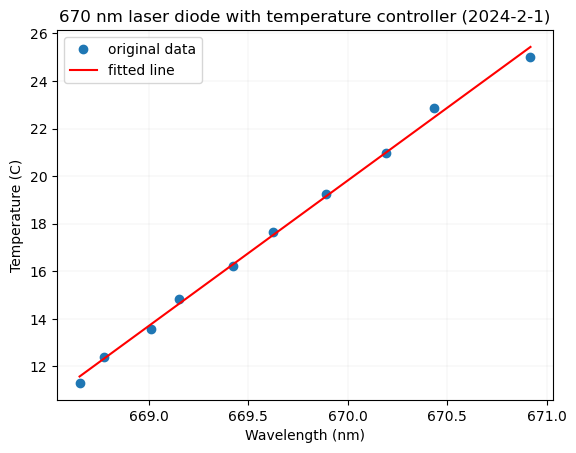

In [25]:
plt.plot(wavelengths, temps, 'o', label='original data')
plt.plot(wavelengths, fit.intercept + fit.slope*np.array(wavelengths), 'r', label='fitted line')
plt.legend()
plt.xlabel('Wavelength (nm)')
plt.ylabel('Temperature (C)')
plt.grid(linewidth=0.1)
plt.title('670 nm laser diode with temperature controller (2024-2-1)')
# plt.txt? couldn't get it to work
plt.show()

In [26]:
print(fit.slope)

6.1130141152294915
